<a href="https://colab.research.google.com/github/VaniaJesus/Estacao-Metereologica/blob/main/Esta%C3%A7%C3%A3o_Metereologica_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
estacao = read.csv('/content/Dados tempo 15d - Página2.csv', sep=',')
estacao

Data,Temp_max,Temp_min,Umidade_min,Vento_max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
23/04/2023,27.6,14.4,43.7,29.6
22/04/2023,28.0,14.6,51.7,30.0
21/04/2023,25.2,11.4,43.7,40.6
20/04/2023,24.9,13.2,34.0,26.8
19/04/2023,26.9,16.0,30.8,29.6
18/04/2023,26.3,19.4,76.6,32.8
17/04/2023,30.0,20.7,56.3,31.0
16/04/2023,29.2,18.4,48.9,28.2
15/04/2023,28.0,19.4,57.3,30.0


In [2]:
estacao$Data = as.Date(estacao$Data)

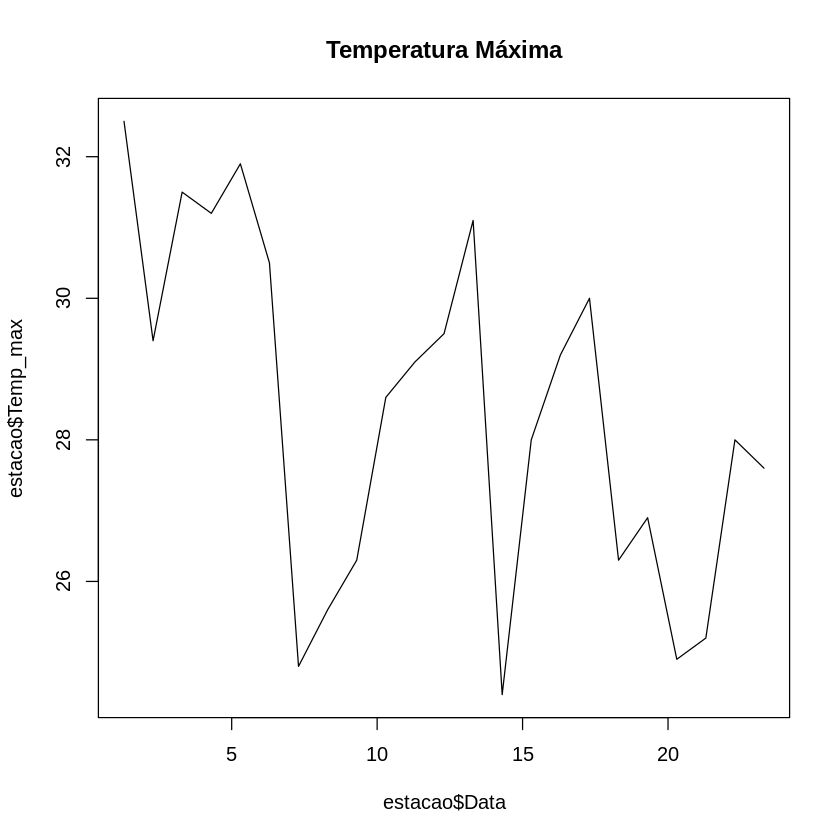

In [3]:
# gráfico temperatura max

plot(estacao$Data,estacao$Temp_max,type='l',main='Temperatura Máxima')

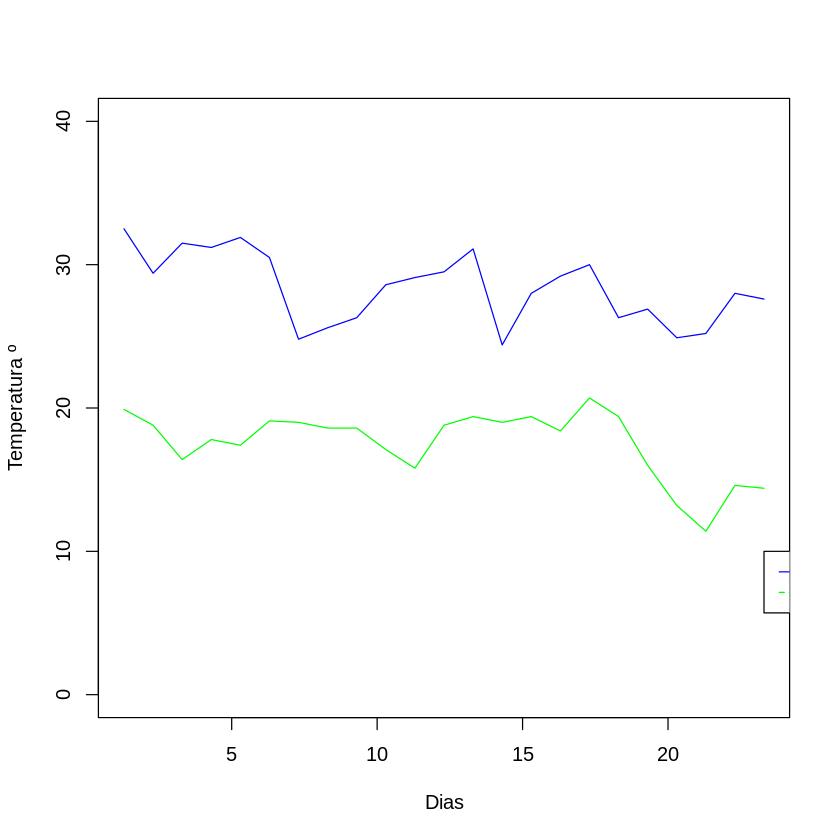

In [4]:
# gráfico de temp max e temperatura mim

plot(estacao$Data,estacao$Temp_max, type='l',col='blue',ylim=c(0,40), xlab='Dias',ylab='Temperatura º')
lines(estacao$Data,estacao$Temp_min, type='l',col='green')
legend(as.Date('23-04-20'), 10,               # posição x, y da lengenda no gráfico (no caso x está em data!)
       legend=c('Máxima', 'Mínima'),       # lengendas
       col=c('blue', 'green'),             # respectivas cores
       lty=1:3,
       cex=0.8)

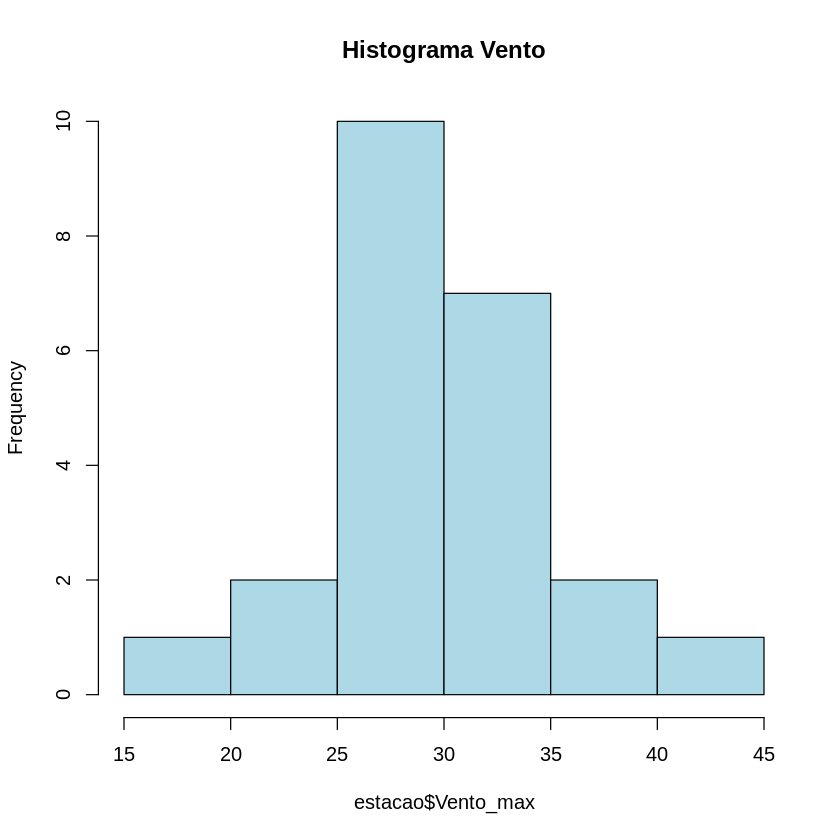

In [5]:
hist(estacao$Vento_max, main='Histograma Vento',col='lightblue')

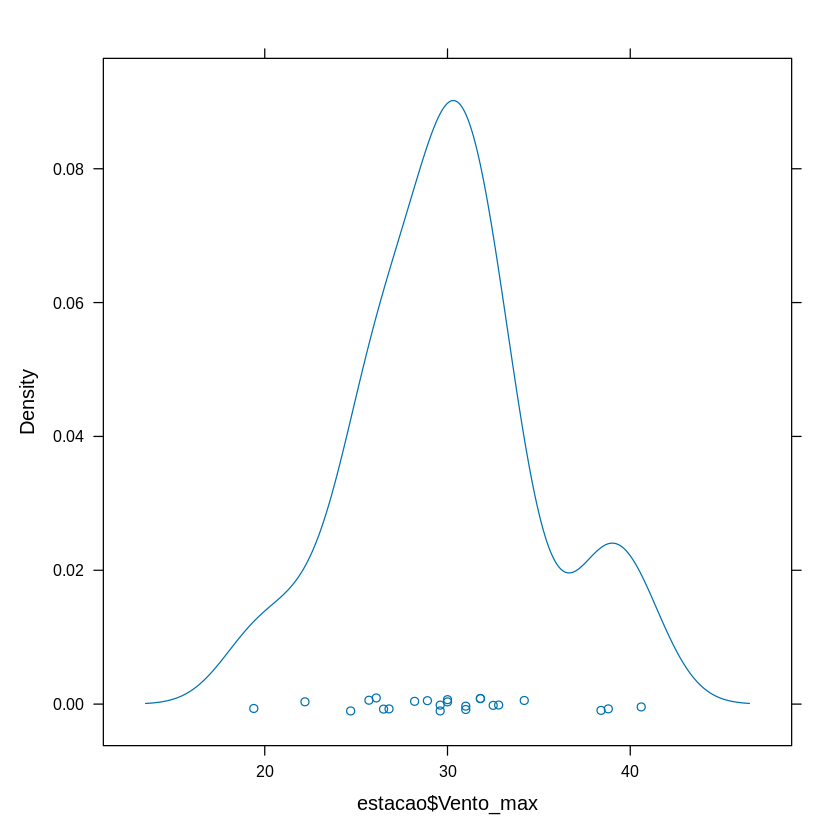

In [6]:
library(lattice)

densityplot(estacao$Vento_max)

In [7]:
temperatura = estacao[ , c('Data','Temp_max','Temp_min')]
head(temperatura)

,Data,Temp_max,Temp_min
,<date>,<dbl>,<dbl>
1,23-04-20,27.6,14.4
2,22-04-20,28.0,14.6
3,21-04-20,25.2,11.4
4,20-04-20,24.9,13.2
5,19-04-20,26.9,16.0
6,18-04-20,26.3,19.4


In [8]:
# Criando uma coluna Dias para não trabalhar com datas

temperatura["Dias"]<-c(23:1)
head(temperatura)

,Data,Temp_max,Temp_min,Dias
,<date>,<dbl>,<dbl>,<int>
1,23-04-20,27.6,14.4,23
2,22-04-20,28.0,14.6,22
3,21-04-20,25.2,11.4,21
4,20-04-20,24.9,13.2,20
5,19-04-20,26.9,16.0,19
6,18-04-20,26.3,19.4,18


In [9]:
estacao["Dias"]<-c(23:1)
head(estacao)

,Data,Temp_max,Temp_min,Umidade_min,Vento_max,Dias
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,23-04-20,27.6,14.4,43.7,29.6,23
2,22-04-20,28.0,14.6,51.7,30.0,22
3,21-04-20,25.2,11.4,43.7,40.6,21
4,20-04-20,24.9,13.2,34.0,26.8,20
5,19-04-20,26.9,16.0,30.8,29.6,19
6,18-04-20,26.3,19.4,76.6,32.8,18


In [10]:
# Separando os dados - Vento

vento = estacao[ , c('Dias', 'Vento_max')]
head(vento)

,Dias,Vento_max
,<int>,<dbl>
1,23,29.6
2,22,30.0
3,21,40.6
4,20,26.8
5,19,29.6
6,18,32.8


In [11]:
# Umidade

umidade = estacao[ , c('Dias', 'Umidade_min')]
head(umidade)



,Dias,Umidade_min
,<int>,<dbl>
1,23,43.7
2,22,51.7
3,21,43.7
4,20,34.0
5,19,30.8
6,18,76.6


In [12]:
# Calcular as médias da temperatura

media <- rowMeans(temperatura[, c("Temp_max", "Temp_min")])
media

# inserindo uma nova coluna

temperatura["Temp_Media"]<-c(media)
temperatura

[1] 21.00 21.30 18.30 19.05 21.45 22.85 25.35 23.80 23.70 21.70 25.25 24.15
[13] 22.45 22.85 22.45 22.10 21.90 24.80 24.65 24.50 23.95 24.10 26.20

Data,Temp_max,Temp_min,Dias,Temp_Media
<date>,<dbl>,<dbl>,<int>,<dbl>
23-04-20,27.6,14.4,23,21.00
22-04-20,28.0,14.6,22,21.30
21-04-20,25.2,11.4,21,18.30
20-04-20,24.9,13.2,20,19.05
19-04-20,26.9,16.0,19,21.45
18-04-20,26.3,19.4,18,22.85
17-04-20,30.0,20.7,17,25.35
16-04-20,29.2,18.4,16,23.80
15-04-20,28.0,19.4,15,23.70


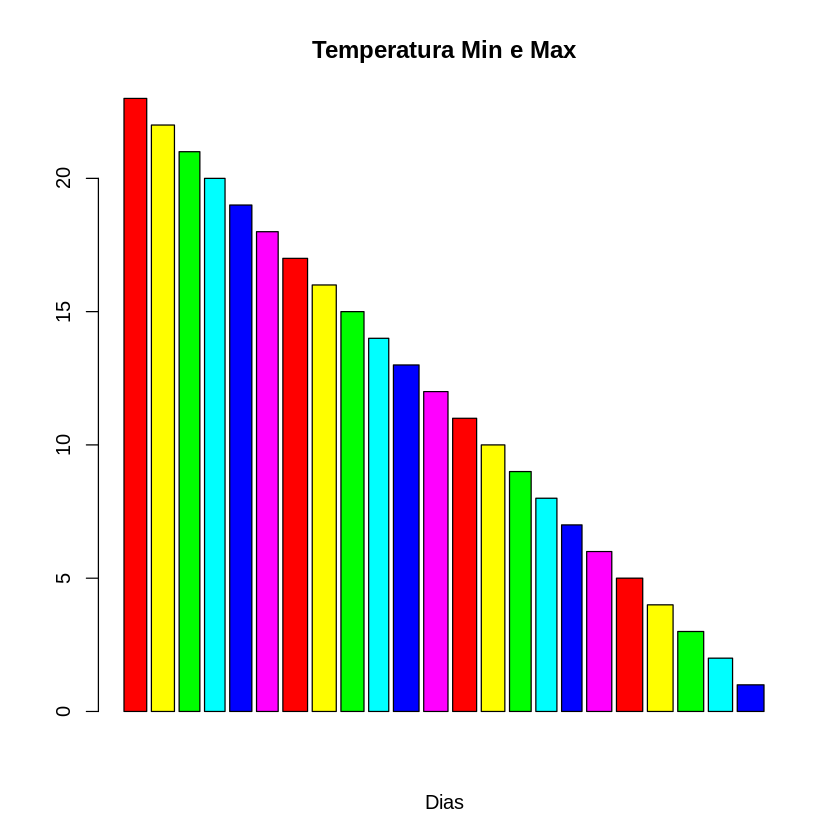

In [13]:
# Gráfico de temperatura

barplot(temperatura$Dias, temperatura$Temp_max, main="Temperatura Min e Max",
  xlab="Dias",
  legend = rownames(media),
  beside=FALSE,
  col=rainbow(6)) # fornece 6 cores diferentes

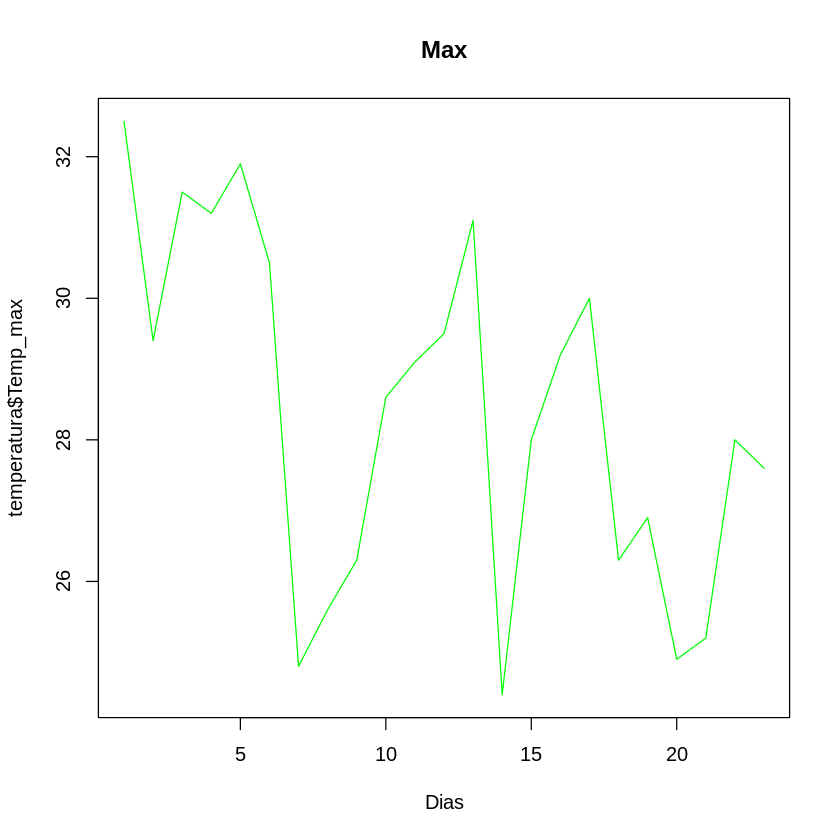

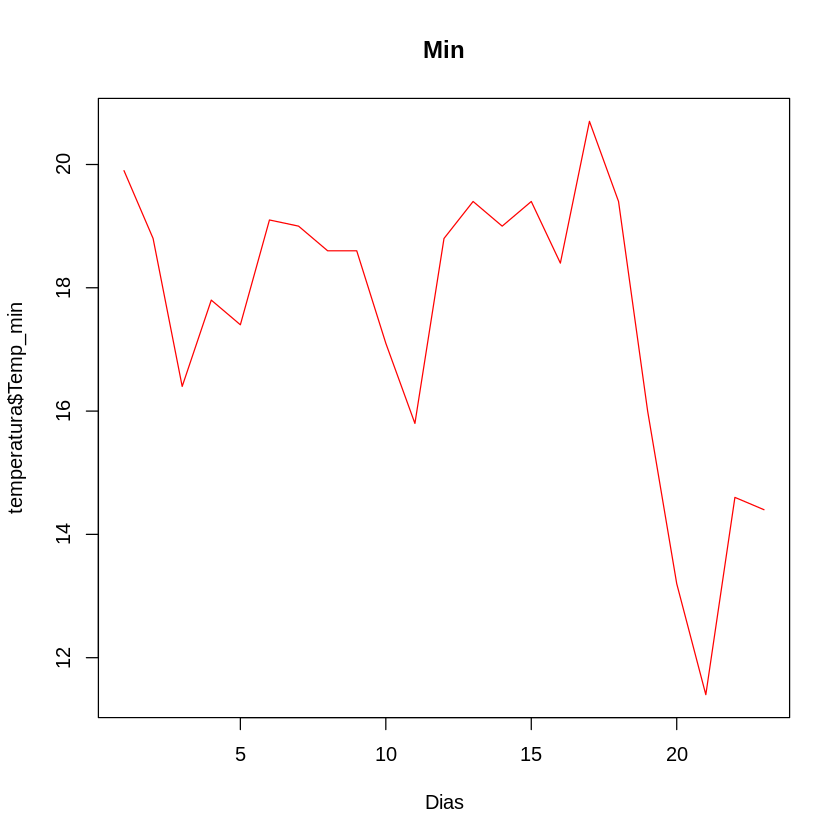

In [14]:
plot(temperatura$Dias,temperatura$Temp_max,type='l',main='Max', col= 'green',
  xlab="Dias")
plot(temperatura$Dias,temperatura$Temp_min,type='l',main='Min', col= 'red',
 xlab="Dias")

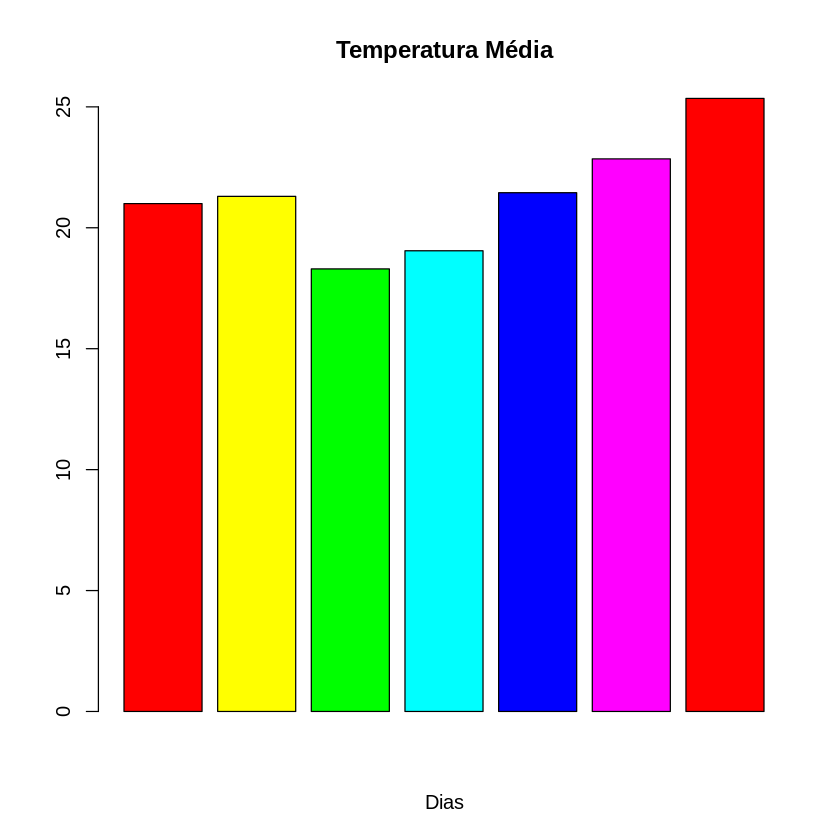

In [15]:
# Seleção de 7 dias

barplot(media [1:7], main="Temperatura Média",
  xlab="Dias",
  legend = rownames(media),
  beside=TRUE,
  col=rainbow(6)) # fornece 6 cores diferentes

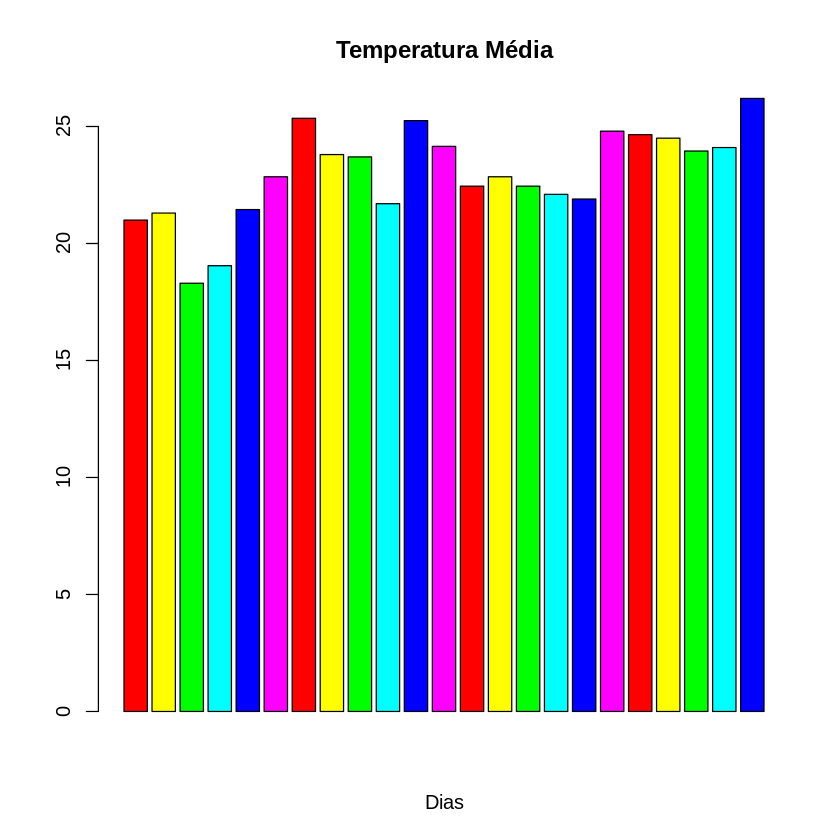

In [16]:
#  O período todo

barplot(media, main="Temperatura Média",
  xlab="Dias",
  legend = rownames(media),
  beside=TRUE,
  col=rainbow(6)) # fornece 6 cores diferentes

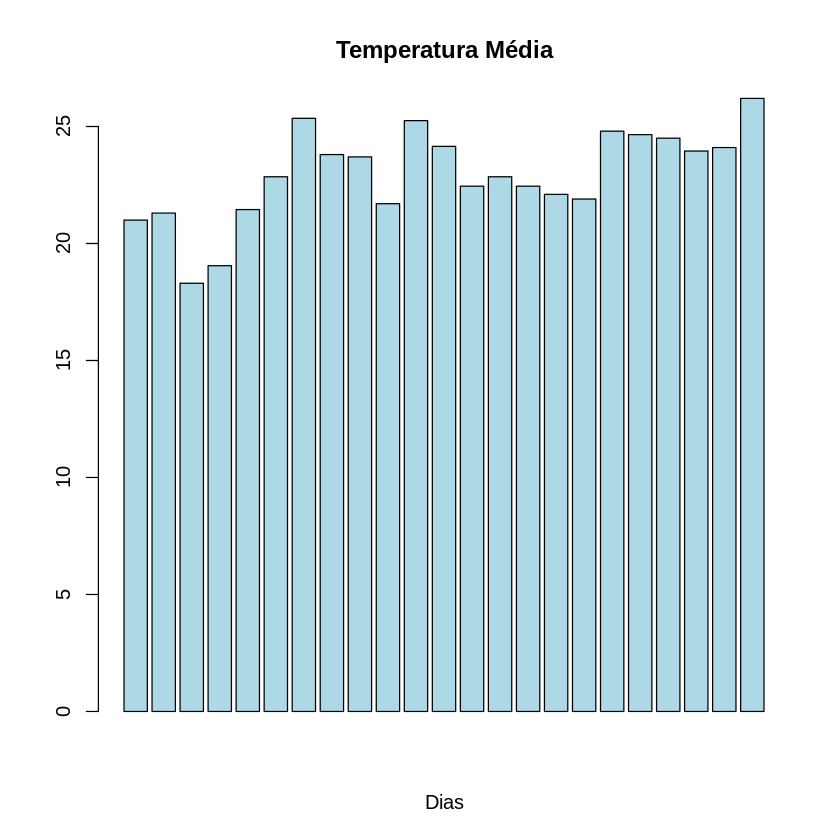

In [17]:
# Ainda o período todo

barplot(temperatura$Temp_Media, main = 'Temperatura Média',
   xlab="Dias",
   legend = rownames(media),
   col='lightblue' )

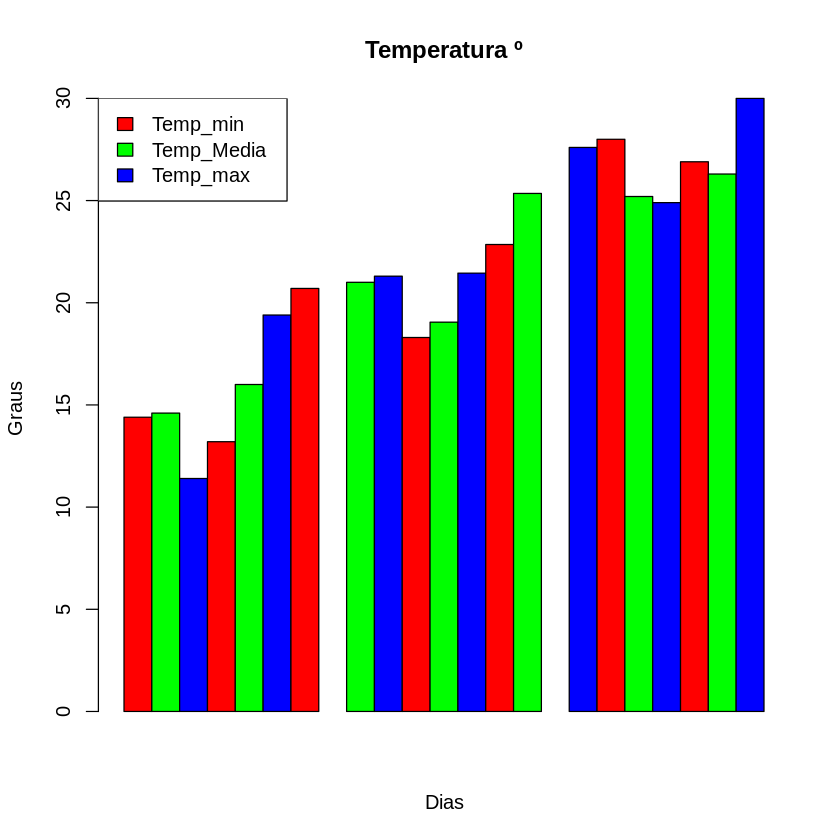

In [18]:
# Criando uma matriz com as variáveis

temp_matrix <- cbind(temperatura$Temp_min[1:7], temperatura$Temp_Media[1:7], temperatura$Temp_max[1:7])

# Criando o gráfico de barras
barplot(temp_matrix, beside=TRUE, main="Temperatura º",
        xlab = 'Dias',
        ylab = 'Graus',
        col=rainbow(3)) # fornece 3 cores diferentes

# Adicionando a legenda
legend("topleft", legend=c("Temp_min", "Temp_Media", "Temp_max"), fill=rainbow(3), bty="c")

In [19]:
# Fazendo um Slice de 7 dias nos dados para melhor visualização dos gráficos

dados7 <- temperatura[1:7, c("Temp_min", "Temp_Media", "Temp_max")]
dados7

,Temp_min,Temp_Media,Temp_max
,<dbl>,<dbl>,<dbl>
1,14.4,21.00,27.6
2,14.6,21.30,28.0
3,11.4,18.30,25.2
4,13.2,19.05,24.9
5,16.0,21.45,26.9
6,19.4,22.85,26.3
7,20.7,25.35,30.0


In [20]:
# 14 Dias

dados14 <- temperatura[1:14, c("Temp_min", "Temp_Media", "Temp_max")]
dados14

,Temp_min,Temp_Media,Temp_max
,<dbl>,<dbl>,<dbl>
1,14.4,21.00,27.6
2,14.6,21.30,28.0
3,11.4,18.30,25.2
4,13.2,19.05,24.9
5,16.0,21.45,26.9
6,19.4,22.85,26.3
7,20.7,25.35,30.0
8,18.4,23.80,29.2
9,19.4,23.70,28.0


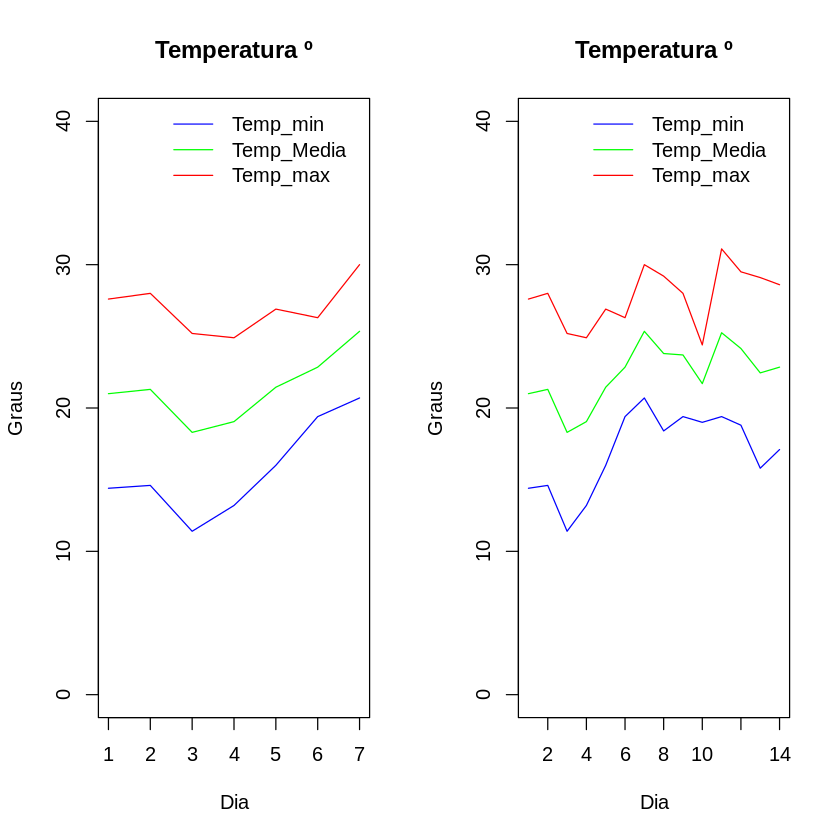

In [21]:
par(mfrow = c(1, 2))

plot(dados7$Temp_min,main = "Temperatura º", type="l", col="blue", ylim=c(0, 40), xlab="Dia", ylab="Graus")
lines(dados7$Temp_Media, type="l", col="green")
lines(dados7$Temp_max, type="l", col="red")
legend("topright", "bottom", legend=c("Temp_min", "Temp_Media", "Temp_max"), col=c("blue", "green", "red"), lty=1, bty="n")


plot(dados14$Temp_min,main = "Temperatura º", type="l", col="blue", ylim=c(0, 40), xlab="Dia", ylab="Graus")
lines(dados14$Temp_Media, type="l", col="green")
lines(dados14$Temp_max, type="l", col="red")
legend("topright", "bottom", legend=c("Temp_min", "Temp_Media", "Temp_max"), col=c("blue", "green", "red"), lty=1, bty="n")

In [22]:
# Slice no dataset Vento

vento1 <- vento[1:1, c("Vento_max", "Dias")]
vento1

,Vento_max,Dias
,<dbl>,<int>
1,29.6,23


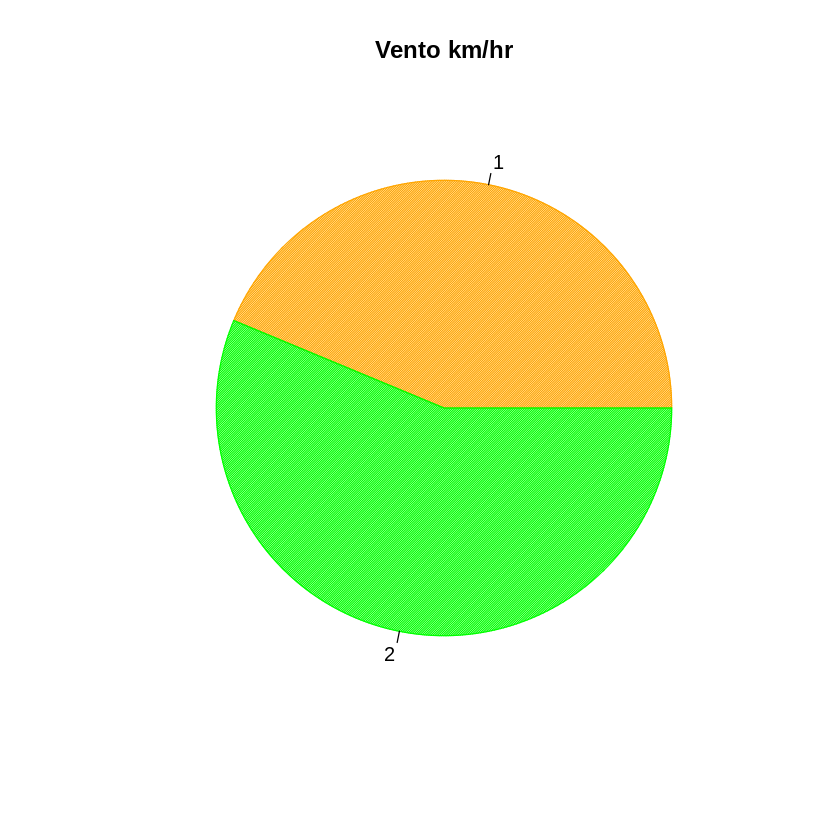

In [23]:
pie(c(vento1$Dias,vento1$Vento_max), col=c("orange","green") ,density=80, main='Vento km/hr' )

In [28]:
# Slice Vento

vento3 <- vento[1:3, c("Vento_max", "Dias")]
vento3

,Vento_max,Dias
,<dbl>,<int>
1,29.6,23
2,30.0,22
3,40.6,21


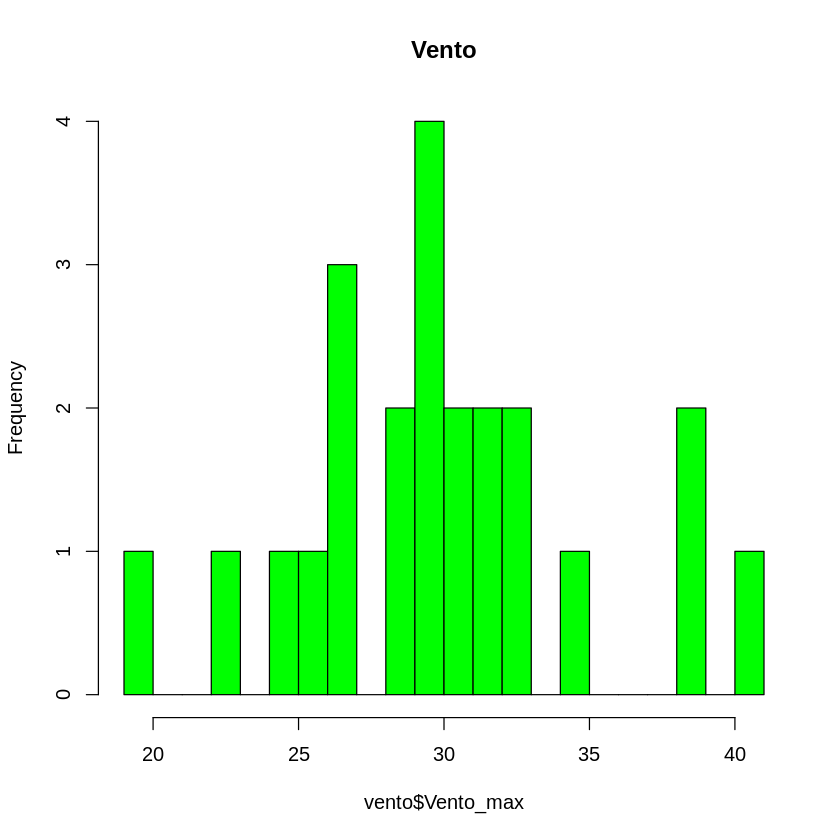

In [30]:
hist(vento$Vento_max, breaks = 30, main='Vento' , col='green' )

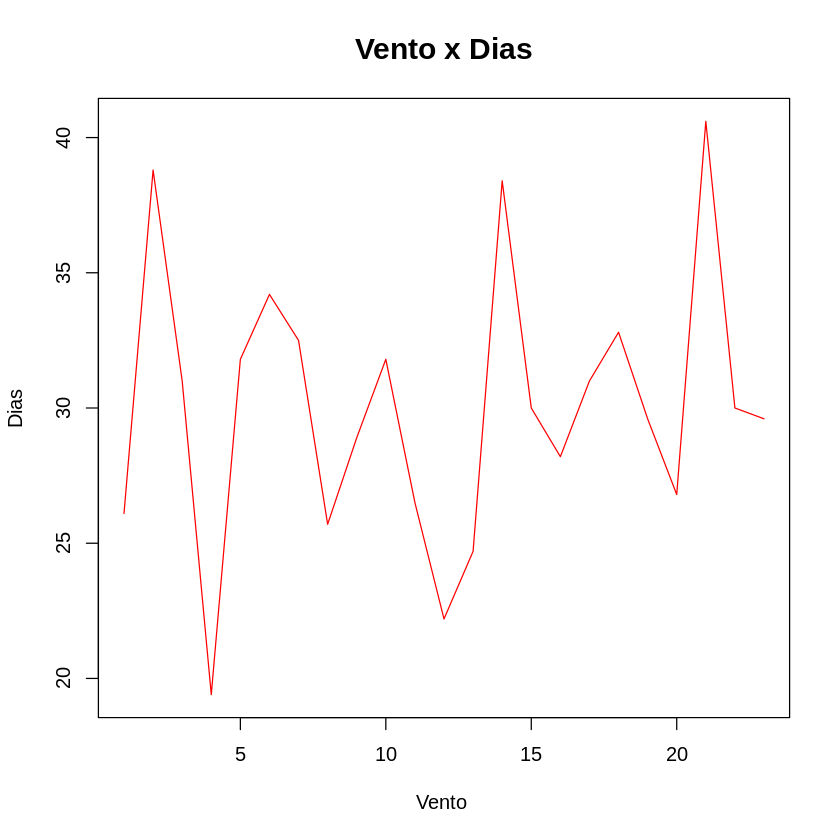

In [31]:
plot(vento$Dias,vento$Vento_max, type='l', main='Vento x Dias', col='red', xlab = 'Vento ', ylab ='Dias', cex.main=1.5)

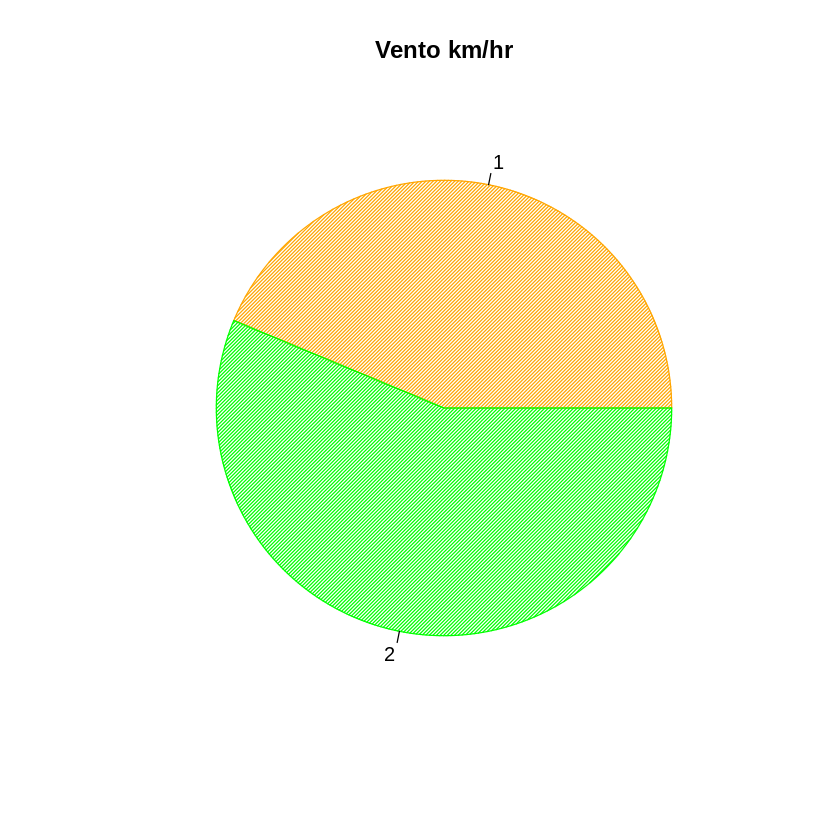

In [32]:
pie(c(vento1$Dias,vento1$Vento_max), col=c("orange","green") ,density=50, main='Vento km/hr' )

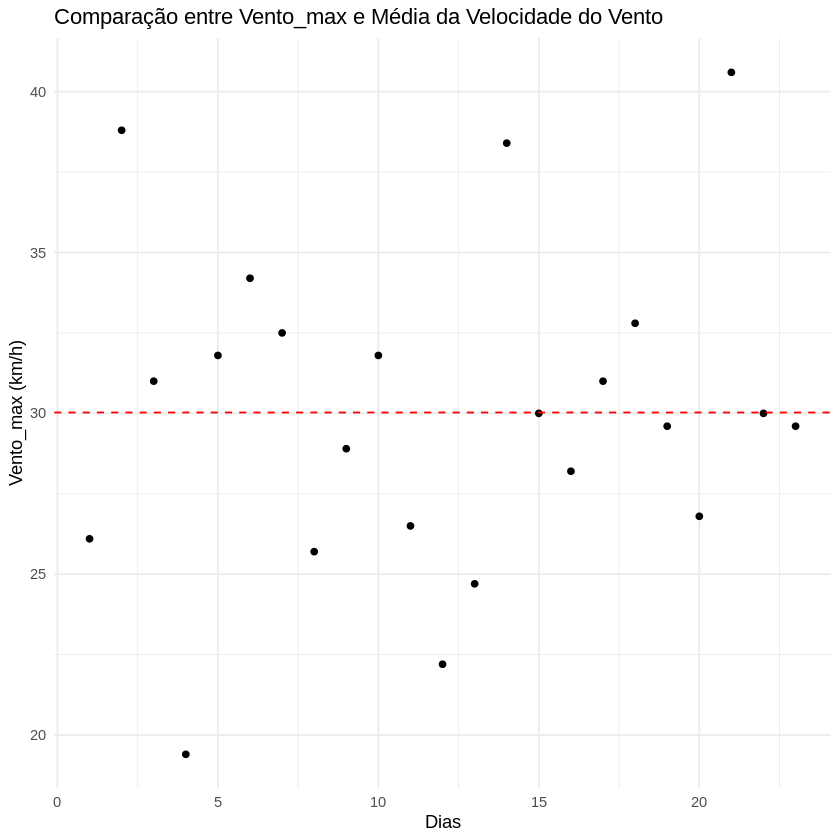

In [34]:
# Criando um gráfico de dispersão para comparar o vento máx a 100 km/H

library(ggplot2)

# Calcule a média da velocidade do vento
media_vento <- mean(vento$Vento_max)

# Crie o gráfico de dispersão com a linha na média
ggplot(vento, aes(x = Dias, y = Vento_max)) +
  geom_point() +  # Plot de pontos
  geom_hline(yintercept = media_vento, color = "red", linetype = "dashed") +  # Linha horizontal na média
  labs(x = "Dias", y = "Vento_max (km/h)") +  # Rótulos dos eixos
  ggtitle("Comparação entre Vento_max e Média da Velocidade do Vento") +  # Título do gráfico
  theme_minimal()  # Estilo do gráfico

